In [1]:
# import the necessary libraries
import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot, skew
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import re
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv(r'C:/Users/chand/Downloads/606/ppv.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14782 entries, 0 to 14781
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VAERS_ID      14782 non-null  int64  
 1   STATE         14782 non-null  object 
 2   AGE_YRS       14782 non-null  float64
 3   SEX           14782 non-null  int64  
 4   SYMPTOM_TEXT  14782 non-null  object 
 5   DIED          14782 non-null  int64  
 6   L_THREAT      14782 non-null  int64  
 7   HOSPITAL      14782 non-null  int64  
 8   HOSPDAYS      14782 non-null  float64
 9   DISABLE       14782 non-null  int64  
 10  RECOVD        14782 non-null  int64  
 11  VAX_DATE      14782 non-null  object 
 12  ONSET_DATE    14782 non-null  object 
 13  NUMDAYS       14782 non-null  int64  
 14  OTHER_MEDS    14782 non-null  object 
 15  CUR_ILL       14782 non-null  object 
 16  HISTORY       14782 non-null  object 
 17  BIRTH_DEFECT  14782 non-null  int64  
 18  ALLERGIES     14782 non-nu

In [4]:
df.describe()

VAERS_ID       AGE_YRS           SEX          DIED      L_THREAT  \
count  1.478200e+04  14782.000000  14782.000000  14782.000000  14782.000000   
mean   1.003092e+06     62.069882      0.260520      0.000947      0.009877   
std    5.122006e+05     15.619167      0.450194      0.030761      0.098894   
min    7.012620e+05      5.000000      0.000000      0.000000      0.000000   
25%    7.486652e+05     57.000000      0.000000      0.000000      0.000000   
50%    8.134945e+05     66.000000      0.000000      0.000000      0.000000   
75%    8.865470e+05     71.000000      1.000000      0.000000      0.000000   
max    2.793696e+06     90.000000      2.000000      1.000000      1.000000   

           HOSPITAL      HOSPDAYS       DISABLE        RECOVD       NUMDAYS  \
count  14782.000000  14782.000000  14782.000000  14782.000000  14782.000000   
mean       0.053579      0.216209      0.018671      0.983223     16.042687   
std        0.225192      1.904048      0.135366      0.812420    409.836207   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      1.000000      0.000000   
75%        0.000000      0.000000      0.000000      2.000000      1.000000   
max        1.000000     50.000000      1.000000      2.000000  27615.000000   

       BIRTH_DEFECT       SERIOUS  
count  14782.000000  14782.000000  
mean       0.000203      0.096333  
std        0.014245      0.295058  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        1.000000      1.000000

In [5]:
# Check if duplicates have been dropped
df.drop_duplicates(inplace=True)
df.duplicated().value_counts()

False    14775
Name: count, dtype: int64

In [6]:
df.head()

VAERS_ID STATE  AGE_YRS  SEX  \
0    701262    RI     66.0    0   
1    701359    SC     85.0    1   
2    701366    NJ     76.0    0   
3    702363    TN     66.0    0   
4    702366    NC     75.0    0   

                                        SYMPTOM_TEXT  DIED  L_THREAT  \
0  RED WARM SORE ARM AFTER INJECTION TYLENOL ICE ...     0         0   
1  REDNESS SWELLING WARMTH L ARM REACTIONBELOW IN...     0         0   
2         DULL ACHE IN LEFT ARM SWELLING EDEMA PAIN      0         0   
3                PATIENT S ARM SWELLED AND GOT WARM      0         0   
4  MODERATE TO SEVERE PAIN ON SHOULDER NOT IN THE...     0         0   

   HOSPITAL  HOSPDAYS  DISABLE  ...  BIRTH_DEFECT  \
0         0       0.0        0  ...             0   
1         0       0.0        0  ...             0   
2         0       0.0        0  ...             0   
3         0       0.0        0  ...             0   
4         0       0.0        0  ...             0   

                                    ALLERGIES          VAX_MANU  \
0                                        NKDA  MERCK & CO. INC.   
1                                        NKDA  MERCK & CO. INC.   
2                                        NKDA  MERCK & CO. INC.   
3                                  PENICILLIN  MERCK & CO. INC.   
4  CRAB MEAT ZYBAN VIOXX ERYTHROMYCIN VICODIN  MERCK & CO. INC.   

             VAX_NAME                 SYMPTOM1                 SYMPTOM2  \
0  PNEUMO (PNEUMOVAX)                 ERYTHEMA    IMPAIRED WORK ABILITY   
1  PNEUMO (PNEUMOVAX)  INJECTION SITE ERYTHEMA  INJECTION SITE SWELLING   
2  PNEUMO (PNEUMOVAX)        OEDEMA PERIPHERAL        PAIN IN EXTREMITY   
3  PNEUMO (PNEUMOVAX)      PERIPHERAL SWELLING                SKIN WARM   
4  PNEUMO (PNEUMOVAX)     MUSCULOSKELETAL PAIN                     PAIN   

                SYMPTOM3   SYMPTOM4 SYMPTOM5 SERIOUS  
0      PAIN IN EXTREMITY  SKIN WARM                0  
1  INJECTION SITE WARMTH                           0  
2    PERIPHERAL SWELLING                           0  
3                                                  0  
4      PAIN IN EXTREMITY                           0  

[5 rows x 27 columns]

In [7]:
df[['SYMPTOM_TEXT', 'OTHER_MEDS', 'HISTORY', 'ALLERGIES']].head()

SYMPTOM_TEXT  \
0  RED WARM SORE ARM AFTER INJECTION TYLENOL ICE ...   
1  REDNESS SWELLING WARMTH L ARM REACTIONBELOW IN...   
2         DULL ACHE IN LEFT ARM SWELLING EDEMA PAIN    
3                PATIENT S ARM SWELLED AND GOT WARM    
4  MODERATE TO SEVERE PAIN ON SHOULDER NOT IN THE...   

                                          OTHER_MEDS  \
0                                ASPIRIN TYLENOL PRN   
1                                       SEE ATTACHED   
2  LEVOTHYROXINE MCG ALENDRONATE MG LOSARTAN MG M...   
3  ALENDRONATE MG METFORMIN MG ATENOLOL CHLO LISI...   
4                                                      

                                           HISTORY  \
0             HTN OSTEOPOROSIS DEPRESSIVE DISORDER   
1                                                    
2                                   HYPOTHRYOIDISM   
3    DIABETES HIGH BLOOD PRESSURE HIGH CHOLESTEROL   
4  ARTHRITIS HIGH CHOLESTEROL BURSITIS KNEES HIPS    

                                    ALLERGIES  
0                                        NKDA  
1                                        NKDA  
2                                        NKDA  
3                                  PENICILLIN  
4  CRAB MEAT ZYBAN VIOXX ERYTHROMYCIN VICODIN

In [8]:
df['SERIOUS'].value_counts()

SERIOUS
0    13351
1     1424
Name: count, dtype: int64

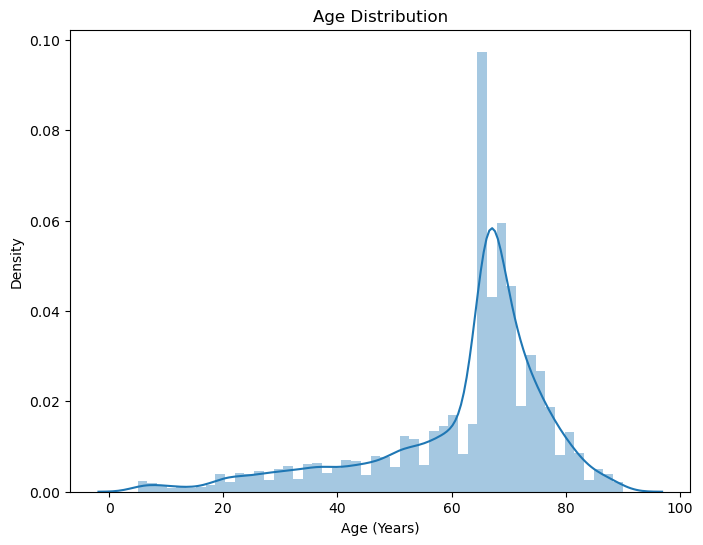

In [9]:
# Distplot
plt.figure(figsize=(8, 6))
sns.distplot(df['AGE_YRS'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age (Years)')
plt.ylabel('Density')
plt.show()

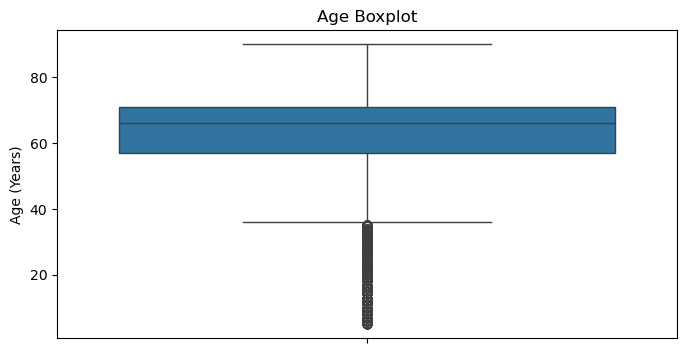

In [10]:
# Boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(y=df['AGE_YRS'])
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')
plt.show()

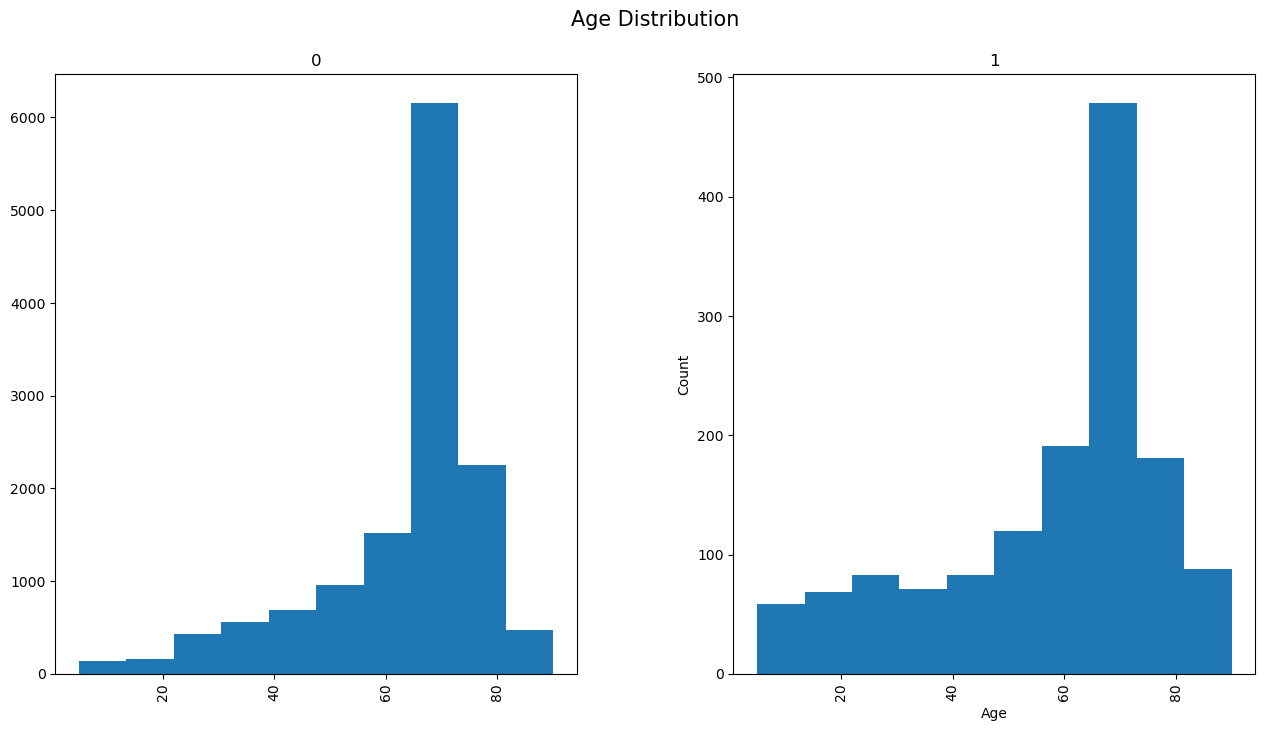

In [11]:
# Distribution of adverse event severity based on age
df['AGE_YRS'].hist(by=df['SERIOUS'], figsize=(15,8))
plt.xlabel('Age')
plt.ylabel('Count')
plt.suptitle('Age Distribution', fontsize=15);

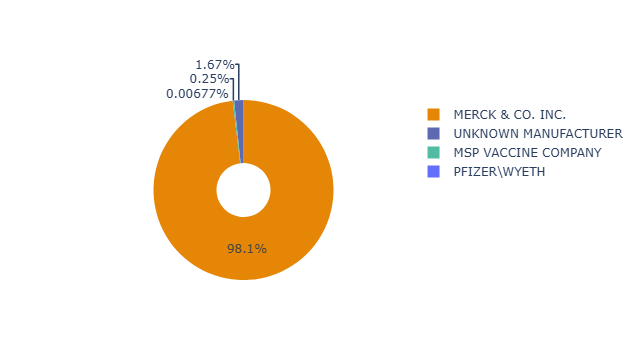

<Figure size 1500x800 with 0 Axes>

In [12]:
plt.figure(figsize=(15,8))
labels = df['VAX_MANU'].value_counts().index
values = df['VAX_MANU'].value_counts().values

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3,marker_colors = [
                      'rgb(229, 134, 6)', 'rgb(93, 105, 177)', 'rgb(82, 188, 163)'])])
fig.show()

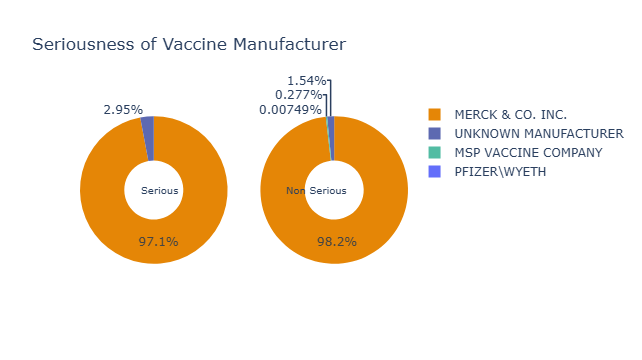

In [13]:
labels = df['VAX_MANU'].value_counts().index
values1 = df[df['SERIOUS'] == 1].VAX_MANU.value_counts().values
values2 = df[df['SERIOUS'] == 0].VAX_MANU.value_counts().values

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values= values1, name="Serious case",marker_colors = [ 'rgb(229, 134, 6)', 'rgb(93, 105, 177)', 'rgb(82, 188, 163)']),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=values2, name="Non Serious case",marker_colors = [ 'rgb(229, 134, 6)', 'rgb(93, 105, 177)', 'rgb(82, 188, 163)']),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Seriousness of Vaccine Manufacturer",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Serious', x=0.18, y=0.5, font_size=10, showarrow=False),
                 dict(text='Non Serious', x=0.82, y=0.5, font_size=10, showarrow=False)])
fig.show()

In [14]:
# As unknown manufacturer are negligible 
df = df[~df['VAX_MANU'].isin(['UNKNOWN MANUFACTURER'])]  

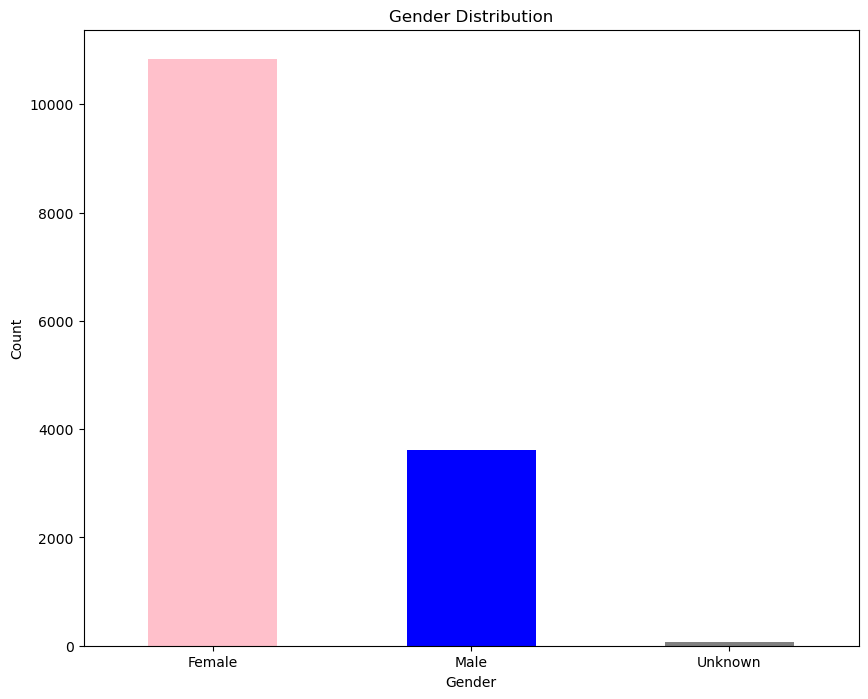

In [15]:
gender_mapping = {0: 'Female', 1: 'Male', 2: 'Unknown'}
df['Gender'] = df['SEX'].map(gender_mapping)

plt.figure(figsize=(10,8))
route = df['Gender'].value_counts()

# Define colors for each gender category
colors = {'Female': 'pink', 'Male': 'blue', 'Unknown': 'gray'}

# Plot the bars with specific colors
route.plot(kind='bar', title='Gender Distribution', color=[colors[gender] for gender in route.index])

plt.xticks(rotation=0)
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

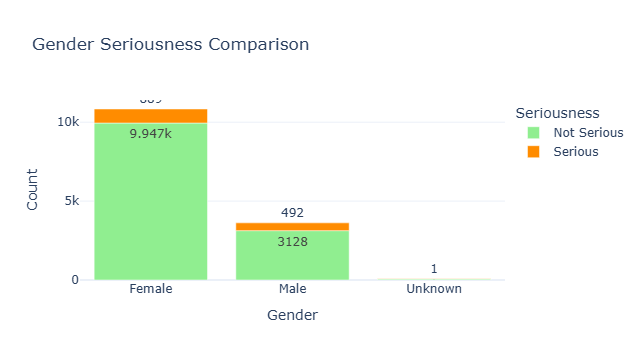

In [16]:
gender_serious = (df.groupby(['SEX', 'SERIOUS']).size()
                  .sort_values(ascending=False)
                  .reset_index(name='count'))

# Define mappings
map_dict = {0: "Female", 1: "Male", 2: "Unknown"}
map_dict_s = {0: "Not Serious", 1: "Serious"}

# Apply mappings
gender_serious["SEX"] = gender_serious["SEX"].map(map_dict)
gender_serious["SERIOUS"] = gender_serious["SERIOUS"].map(map_dict_s)

# New color scheme
new_colors = {'Serious': 'darkorange', 'Not Serious': 'lightgreen'}

# Create the bar plot with new colors
fig = px.bar(gender_serious, x="SEX", y="count", color="SERIOUS", 
             title="Gender Seriousness Comparison",
             text_auto=True,
             color_discrete_map=new_colors)

# Update layout for better visualization
fig.update_layout(
    template="plotly_white",
    xaxis_title="Gender",
    yaxis_title="Count",
    legend_title="Seriousness"
)
fig.show()

In [17]:
# drop all rows with unkown SEX
df = df[df['SEX'] != 2]

In [18]:
age_serious = df[['AGE_YRS', 'SERIOUS']]
map_dict_s = {1: "Serious", 0 : "Non Serious"}
age_serious["SERIOUS"] = age_serious["SERIOUS"].map(map_dict_s)

bins = [10, 20, 30, 40, 50, 60,70,80,90]
group = ['< 20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']
categories = pd.cut(age_serious['AGE_YRS'], bins, labels=group)
age_serious['AGE_CATEGORY'] = categories

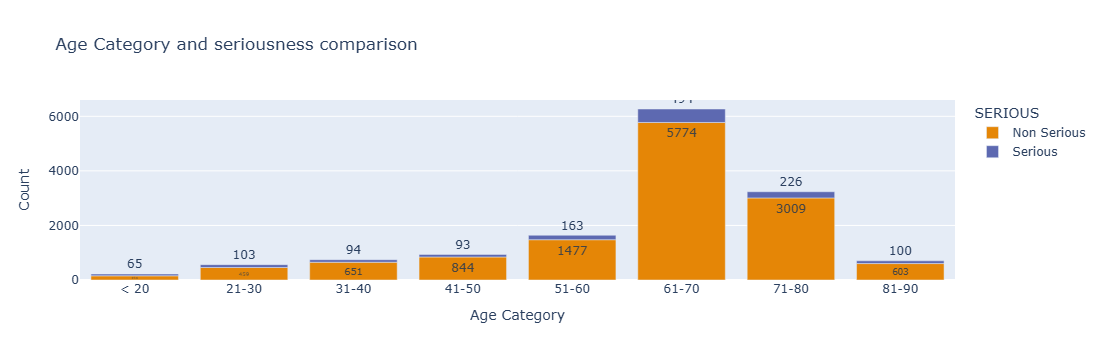

In [19]:
age_serious_group = (age_serious.groupby(['AGE_CATEGORY', 'SERIOUS']).size() 
   .reset_index(name='count'))

# Sort the DataFrame by AGE_CATEGORY
age_serious_group['AGE_CATEGORY'] = pd.Categorical(age_serious_group['AGE_CATEGORY'], categories=group, ordered=True)
age_serious_group = age_serious_group.sort_values('AGE_CATEGORY')

# Create the plot
fig = px.bar(age_serious_group, x="AGE_CATEGORY", y="count", color="SERIOUS", 
             text_auto=True,
             color_discrete_sequence=px.colors.qualitative.Vivid,
             title="Age Category and seriousness comparison")
fig.update_layout(
    template="plotly",
    xaxis=dict(title_text="Age Category"),
    yaxis=dict(title_text="Count")
)
fig.show()

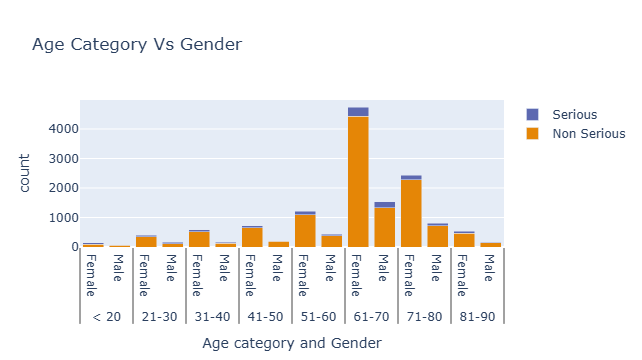

In [20]:
age_serious_sex = df[['AGE_YRS','SEX', 'SERIOUS']]
map_dict_s = {1: "Serious", 0 : "Non Serious"}
map_dict = {1: "Male", 0 : "Female"}
age_serious_sex["SERIOUS"] = age_serious_sex["SERIOUS"].map(map_dict_s)
age_serious_sex["SEX"] = age_serious_sex["SEX"].map(map_dict)
bins = [10, 20, 30, 40, 50, 60,70,80,90]
group = ['< 20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']
categories = pd.cut(age_serious_sex['AGE_YRS'], bins, labels=group)

age_serious_sex['AGE_CATEGORY'] = categories
age_serious_sex1 = (age_serious_sex.groupby(['AGE_CATEGORY','SEX', 'SERIOUS']).size()  
   .reset_index(name='count'))

fig = go.Figure()

fig.update_layout(
    template="plotly",
    xaxis=dict(title_text="Age category and Gender"),
    yaxis=dict(title_text="count"),
    title="Age Category Vs Gender",
    barmode="stack",
)

colors = ['rgb(229, 134, 6)', 'rgb(93, 105, 177)']
for r, c in zip(age_serious_sex1.SERIOUS.unique(), colors):
    plot_df = age_serious_sex1[age_serious_sex1.SERIOUS == r]
    fig.add_trace(
        go.Bar(x=[plot_df.AGE_CATEGORY, plot_df.SEX], y=plot_df['count'], name=r, marker_color=c),
    )

fig

In [21]:
subset_df = df[['AGE_YRS','SEX','DIED','VAX_MANU']]
map_dict_d = {1: "Death", 0 : "No Death"}
map_dict = {1: "Male", 0 : "Female"}
subset_df["SEX"] = subset_df["SEX"].map(map_dict)
subset_df["DIED"] = subset_df["DIED"].map(map_dict_d)

bins = [10, 20, 30, 40, 50, 60,70,80,90]
group = ['< 20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']
categories = pd.cut(subset_df['AGE_YRS'], bins, labels=group)

subset_df['AGE_CATEGORY'] = categories
subset_df

AGE_YRS     SEX      DIED          VAX_MANU AGE_CATEGORY
0         66.0  Female  No Death  MERCK & CO. INC.        61-70
1         85.0    Male  No Death  MERCK & CO. INC.        81-90
2         76.0  Female  No Death  MERCK & CO. INC.        71-80
3         66.0  Female  No Death  MERCK & CO. INC.        61-70
4         75.0  Female  No Death  MERCK & CO. INC.        71-80
...        ...     ...       ...               ...          ...
14777      8.0  Female  No Death  MERCK & CO. INC.          NaN
14778      8.0  Female  No Death  MERCK & CO. INC.          NaN
14779      8.0  Female  No Death  MERCK & CO. INC.          NaN
14780      8.0  Female  No Death  MERCK & CO. INC.          NaN
14781      8.0  Female  No Death  MERCK & CO. INC.          NaN

[14456 rows x 5 columns]

In [22]:
subset_df1 = (subset_df.groupby(['AGE_CATEGORY','SEX', 'DIED']).size()  
   .reset_index(name='count'))

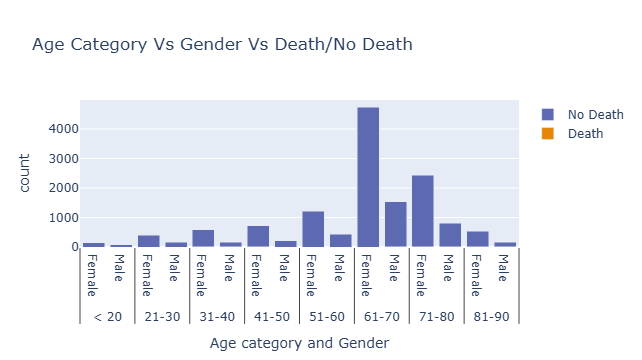

In [23]:
fig = go.Figure()

fig.update_layout(
    template="plotly",
    xaxis=dict(title_text="Age category and Gender"),
    yaxis=dict(title_text="count"),
    title="Age Category Vs Gender Vs Death/No Death",
    barmode="stack",
)

colors = ['rgb(229, 134, 6)', 'rgb(93, 105, 177)']
for r, c in zip(subset_df1.DIED.unique(), colors):
    plot_df = subset_df1[subset_df1.DIED == r]
    fig.add_trace(
        go.Bar(x=[plot_df.AGE_CATEGORY, plot_df.SEX], y=plot_df['count'], name=r, marker_color=c),
    )

fig

In [24]:
sub = subset_df[(subset_df["DIED"] == 'Death')]
sub = (sub.groupby(['DIED','VAX_MANU']).size()  
   .reset_index(name='count'))

In [25]:
sub

DIED          VAX_MANU  count
0  Death  MERCK & CO. INC.     14

In [26]:
sub1 =(df.groupby(['VAX_MANU']).size()  
   .reset_index(name='count'))
sub1 = sub1.rename(columns={"count":"totalcount"})
sub1= sub1.merge(sub, on = 'VAX_MANU')
sub1.drop('DIED',axis=1,inplace=True)
sub1['Percentage'] = sub1['count'].div(sub1['totalcount']).round(4)*100


sub1

VAX_MANU  totalcount  count  Percentage
0  MERCK & CO. INC.       14419     14         0.1

In [27]:
subset_death = df[(df["DIED"] == 1)]
subset_death = subset_death[['VAERS_ID','SYMPTOM1','SYMPTOM2','SYMPTOM3','SYMPTOM4','SYMPTOM5']]
subset_death['Symptoms'] = subset_death[['SYMPTOM1','SYMPTOM2','SYMPTOM3','SYMPTOM4','SYMPTOM5']].apply(lambda x: ','.join(x.dropna()), axis=1)

subset_death

VAERS_ID                         SYMPTOM1               SYMPTOM2  \
4351     767019                   CARDIAC ARREST                  DEATH   
6432     792011                            DEATH                          
6581     795514                           CHILLS                  DEATH   
12359    973966                            DEATH                          
12490   1094197                            DEATH       FEELING ABNORMAL   
12624   1327002                 CHEST DISCOMFORT                  DEATH   
12863   1632238                            DEATH                          
13448   1959230                         COVID-19                  DEATH   
14087   2472495                       CHEST PAIN                  DEATH   
14354   2595708          ACUTE CORONARY SYNDROME  ANTICOAGULANT THERAPY   
14355   2595708        CARDIO-RESPIRATORY ARREST             CHEST PAIN   
14356   2595708  ELECTROCARDIOGRAM T WAVE PEAKED          HAEMODIALYSIS   
14357   2595708                      MYOCARDITIS                   PAIN   
14358   2595708             TROPONIN T INCREASED     TROPONIN INCREASED   

                                     SYMPTOM3                       SYMPTOM4  \
4351                                                                           
6432                                                                           
6581                        PAIN IN EXTREMITY                                  
12359                                                                          
12490                                                                          
12624                                DYSPNOEA                                  
12863                                                                          
13448                               DIARRHOEA                      PNEUMONIA   
14087                                                                          
14354  BLOOD CREATINE PHOSPHOKINASE INCREASED      BLOOD POTASSIUM INCREASED   
14355                                  CHILLS                          DEATH   
14356                         HAEMOFILTRATION                  HYPERKALAEMIA   
14357                       PAIN IN EXTREMITY  PULSELESS ELECTRICAL ACTIVITY   
14358                VENTRICULAR FIBRILLATION                                  

                                      SYMPTOM5  \
4351                                             
6432                                             
6581                                             
12359                                            
12490                                            
12624                                            
12863                                            
13448                                 VOMITING   
14087                                            
14354                           CARDIAC ARREST   
14355  ELECTROCARDIOGRAM ST SEGMENT DEPRESSION   
14356                           INTENSIVE CARE   
14357                           RHABDOMYOLYSIS   
14358                                            

                                                Symptoms  
4351                          CARDIAC ARREST,DEATH, , ,   
6432                                       DEATH, , , ,   
6581                  CHILLS,DEATH,PAIN IN EXTREMITY, ,   
12359                                      DEATH, , , ,   
12490                       DEATH,FEELING ABNORMAL, , ,   
12624                CHEST DISCOMFORT,DEATH,DYSPNOEA, ,   
12863                                      DEATH, , , ,   
13448        COVID-19,DEATH,DIARRHOEA,PNEUMONIA,VOMITING  
14087                             CHEST PAIN,DEATH, , ,   
14354  ACUTE CORONARY SYNDROME,ANTICOAGULANT THERAPY,...  
14355  CARDIO-RESPIRATORY ARREST,CHEST PAIN,CHILLS,DE...  
14356  ELECTROCARDIOGRAM T WAVE PEAKED,HAEMODIALYSIS,...  
14357  MYOCARDITIS,PAIN,PAIN IN EXTREMITY,PULSELESS E...  
14358  TROPONIN T INCREASED,TROPONIN INCREASED,VENTRI...

In [28]:
subset_death = subset_death.groupby(['VAERS_ID','Symptoms']).size().reset_index().rename(columns={0:'count'})
df_all_sym = subset_death.groupby('VAERS_ID')['Symptoms'].apply(','.join).reset_index()
df_sym_id = df_all_sym.assign(Symptoms=df_all_sym.Symptoms.str.split(','))
df_sym1 = df_sym_id.explode('Symptoms')

In [29]:
df_sym1

VAERS_ID                  Symptoms
0     767019            CARDIAC ARREST
0     767019                     DEATH
0     767019                          
0     767019                          
0     767019                          
..       ...                       ...
9    2595708      TROPONIN T INCREASED
9    2595708        TROPONIN INCREASED
9    2595708  VENTRICULAR FIBRILLATION
9    2595708                          
9    2595708                          

[70 rows x 2 columns]

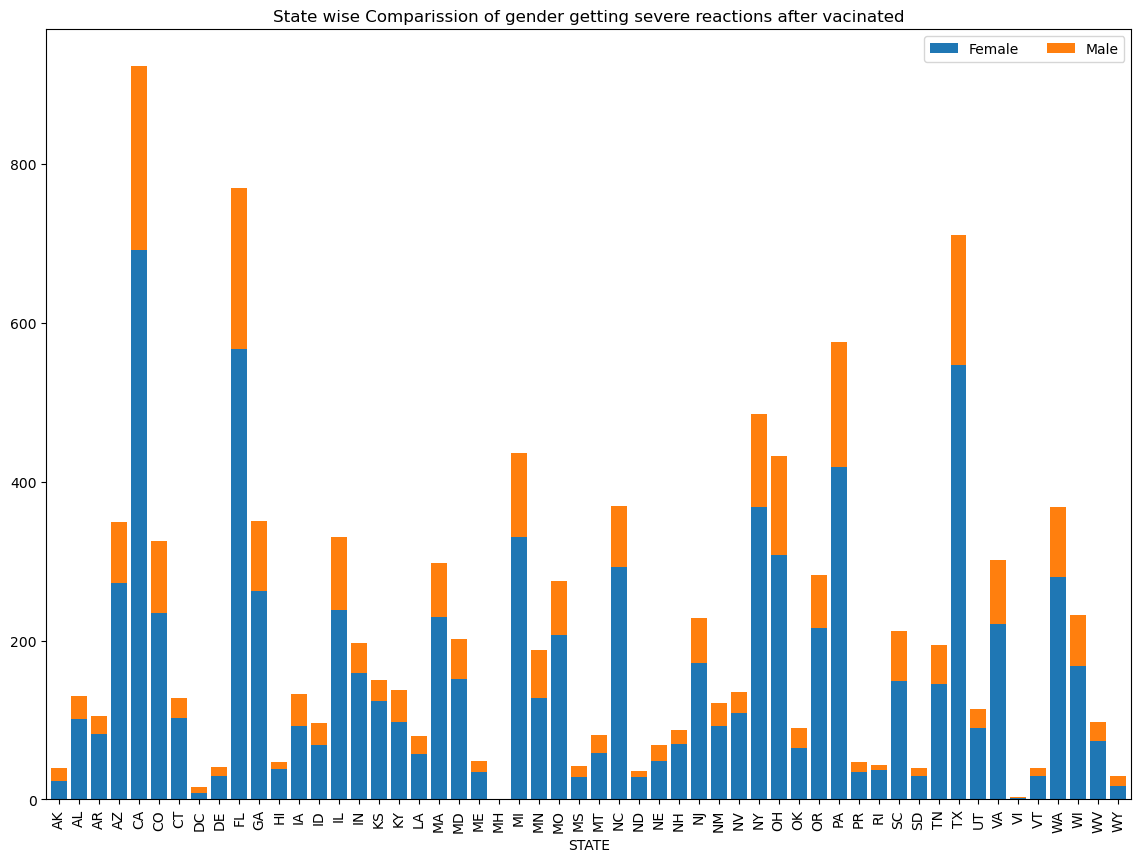

In [30]:
StateAnalysis = df[['VAERS_ID','STATE','VAX_MANU','SEX','AGE_YRS','DIED','RECOVD','SERIOUS']].drop_duplicates()
StateAnalysis = StateAnalysis[StateAnalysis['STATE'] != '']
pd.crosstab(StateAnalysis.STATE,StateAnalysis.SEX).plot.bar(stacked=True,width = .8,figsize=(14, 10))
plt.legend(['Female', 'Male'], loc='upper right', ncol = 3)
plt.title('State wise Comparission of gender getting severe reactions after vacinated', loc ='center')
plt.show()

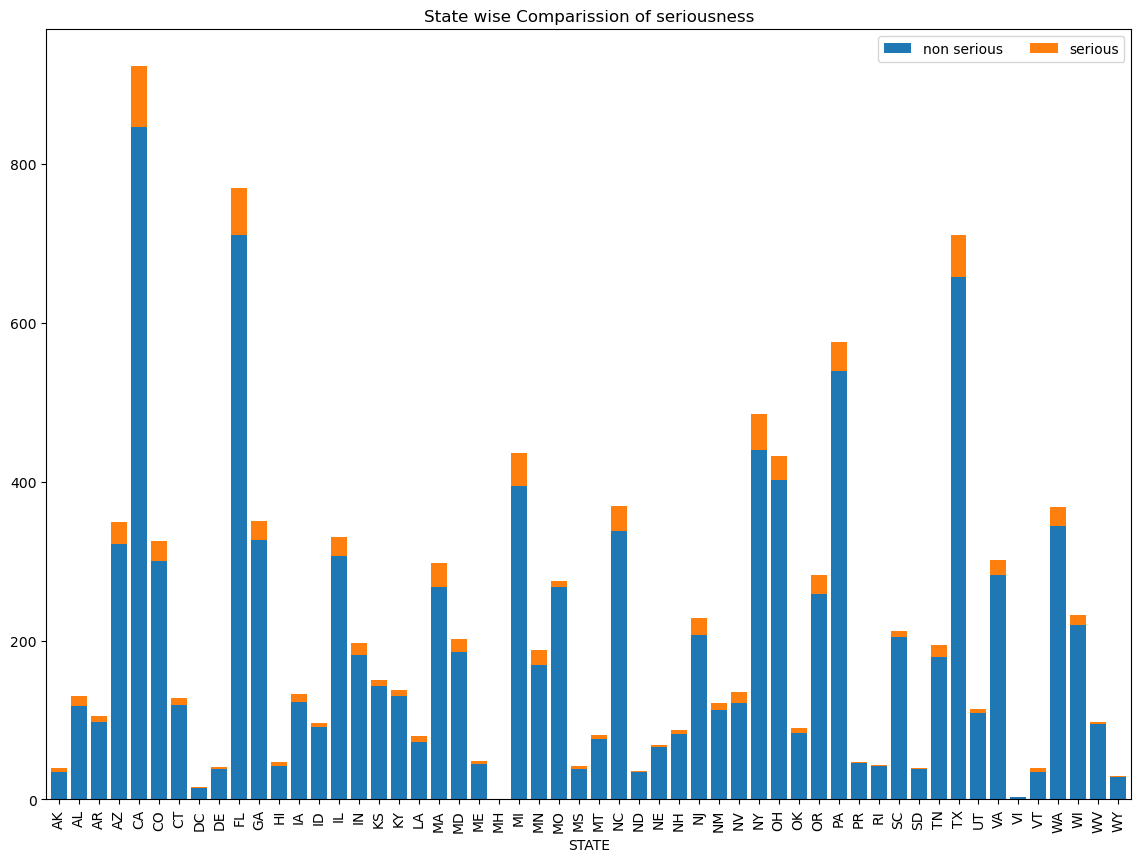

In [31]:
pd.crosstab(StateAnalysis.STATE,StateAnalysis.SERIOUS).plot.bar(stacked=True,width = .8,figsize=(14, 10))
plt.legend(['non serious', 'serious'], loc='upper right', ncol = 3)
plt.title('State wise Comparission of seriousness', loc ='center')
plt.show()

In [32]:
df_allergies = df.filter(['VAERS_ID','ALLERGIES','SERIOUS'], axis=1)
df_allergies.head()

VAERS_ID                                   ALLERGIES  SERIOUS
0    701262                                        NKDA        0
1    701359                                        NKDA        0
2    701366                                        NKDA        0
3    702363                                  PENICILLIN        0
4    702366  CRAB MEAT ZYBAN VIOXX ERYTHROMYCIN VICODIN        0

In [33]:
df_allergies['ALLERGIES'] = df_allergies['ALLERGIES'].astype(str)

# Remove punctuation
df_allergies['ALLERGIES'] = df_allergies['ALLERGIES'].str.replace('[^\w\s]','')

# Convert to lower case
df_allergies['ALLERGIES'] = df_allergies['ALLERGIES'].map(lambda x: x.lower())

# Tokenize
df_allergies['ALLERGIES'] = df_allergies['ALLERGIES'].map(lambda x: x.split())
df_allergies.head()

VAERS_ID                                          ALLERGIES  SERIOUS
0    701262                                             [nkda]        0
1    701359                                             [nkda]        0
2    701366                                             [nkda]        0
3    702363                                       [penicillin]        0
4    702366  [crab, meat, zyban, vioxx, erythromycin, vicodin]        0

In [34]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Stop Words
stop_words=set(stopwords.words("english"))
df_allergies['ALLERGIES'] = df_allergies['ALLERGIES'].map(lambda x: [word for word in x if word not in stop_words])

# Stemming
stemmer = PorterStemmer()
df_allergies['ALLERGIES'] = df_allergies['ALLERGIES'].map(lambda x: [stemmer.stem(y) for y in x])
df_allergies.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chand\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chand\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


VAERS_ID                                          ALLERGIES  SERIOUS
0    701262                                             [nkda]        0
1    701359                                             [nkda]        0
2    701366                                             [nkda]        0
3    702363                                       [penicillin]        0
4    702366  [crab, meat, zyban, vioxx, erythromycin, vicodin]        0

In [35]:
df_allergies.shape

(14456, 3)

In [36]:
df_allergies = df_allergies.explode('ALLERGIES', ignore_index=True)

df_allergies.head(10)

VAERS_ID     ALLERGIES  SERIOUS
0    701262          nkda        0
1    701359          nkda        0
2    701366          nkda        0
3    702363    penicillin        0
4    702366          crab        0
5    702366          meat        0
6    702366         zyban        0
7    702366         vioxx        0
8    702366  erythromycin        0
9    702366       vicodin        0

In [37]:
df_allergies['ALLERGIES'].value_counts(ascending = False)

ALLERGIES
penicillin    1282
allergi       1226
sulfa         1174
known          979
nkda           844
              ... 
tear             1
zostavax         1
transderm        1
scop             1
kiss             1
Name: count, Length: 2414, dtype: int64

In [38]:
# Only kepp allergies that are in more than 1000 patients
allergies_count = df_allergies.ALLERGIES.value_counts()
df_allergies = df_allergies[df_allergies.ALLERGIES.isin(allergies_count.index[allergies_count.gt(100)])]
df_allergies['ALLERGIES'].value_counts(ascending = False)

ALLERGIES
penicillin       1282
allergi          1226
sulfa            1174
known             979
nkda              844
codein            709
nka               697
drug              460
latex             370
morphin           326
rash              221
amoxicillin       213
erythromycin      196
aspirin           184
hive              184
food              164
iodin             160
pcn               158
shellfish         155
antibiot          150
adhes             141
tetracyclin       141
report            135
doxycyclin        132
dye               132
bactrim           131
hydrocodon        131
reaction          130
bee               127
nsaid             124
cipro             116
pollen            116
egg               109
oxycodon          108
demerol           106
augmentin         105
cephalosporin     105
allerg            102
contrast          101
levaquin          101
Name: count, dtype: int64

In [39]:
df_allergies = df_allergies.drop(df_allergies[df_allergies.ALLERGIES.isin(["nan","past","updat","allerg","codein",
                                                                                                   "none","comment","document","drug",
                                                                                                   "vaccin","nka","nkda","allergi","food",
                                                                                                   "known","unknown","reaction","na","report", 
                                                                                                   "medic","n","see","pcn","ba"])].index)
df_allergies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6641 entries, 3 to 32373
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   VAERS_ID   6641 non-null   int64 
 1   ALLERGIES  6641 non-null   object
 2   SERIOUS    6641 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 207.5+ KB


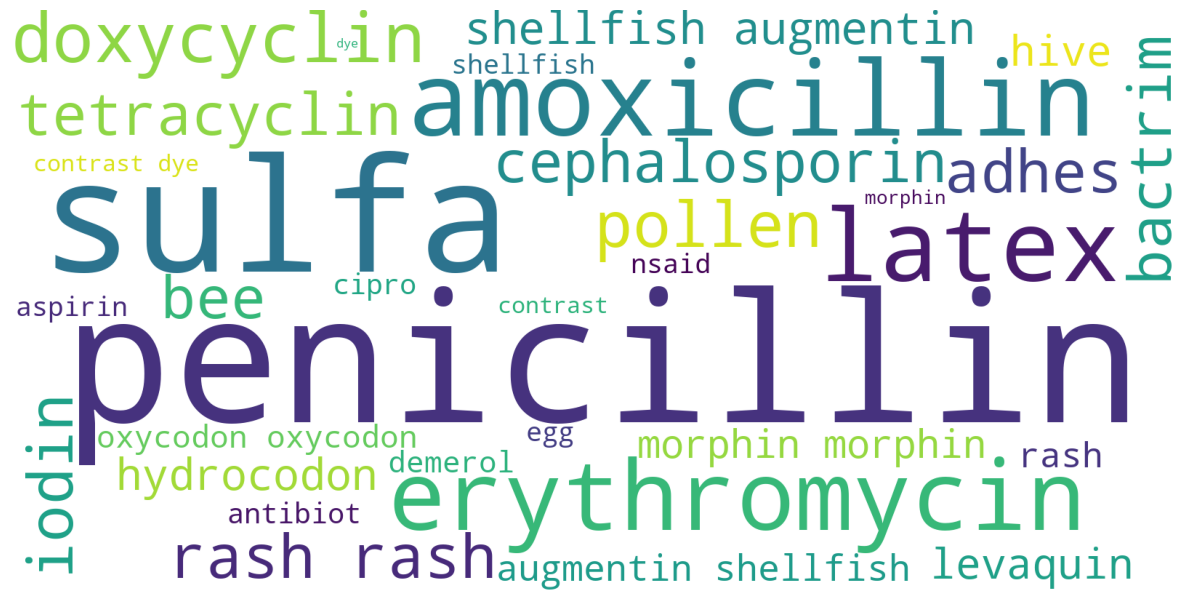

In [40]:
S_ALLERGIES  = df_allergies[df_allergies['SERIOUS']== 1]
wordcloud2 = WordCloud(width=1600, height=800, 
            background_color ='white',min_font_size = 10).generate(' '.join(S_ALLERGIES.ALLERGIES))
plt.figure(figsize=(15,15))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()     

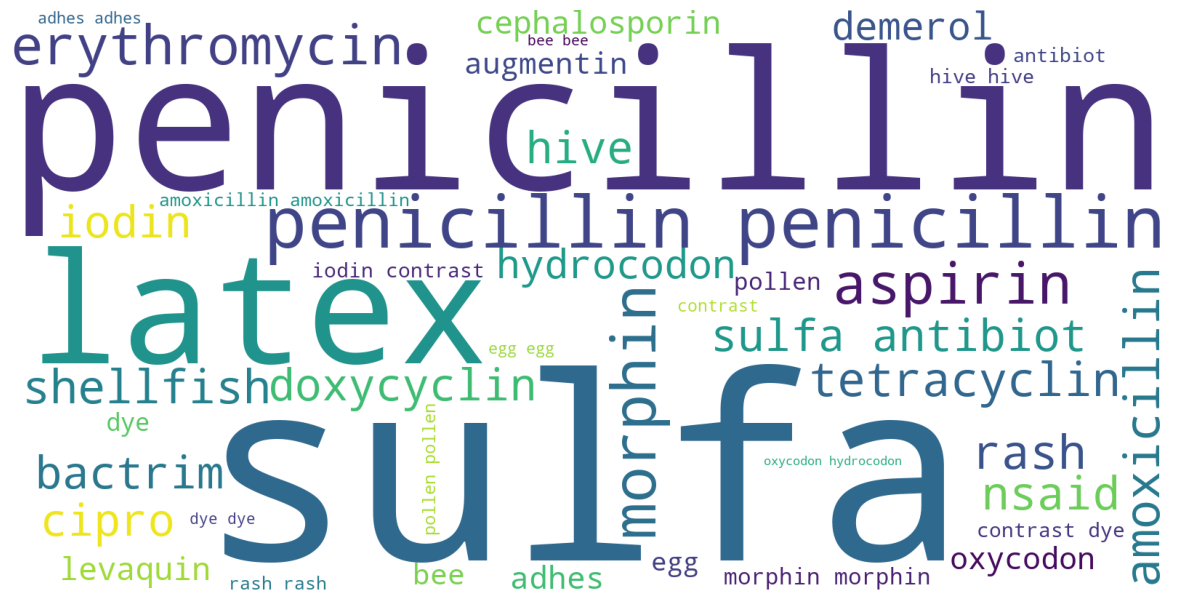

In [41]:
S_ALLERGIES  = df_allergies[df_allergies['SERIOUS']== 0]
wordcloud2 = WordCloud(width=1600, height=800, 
            background_color ='white',min_font_size = 10).generate(' '.join(S_ALLERGIES.ALLERGIES))
plt.figure(figsize=(15,15))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()     

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14456 entries, 0 to 14781
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VAERS_ID      14456 non-null  int64  
 1   STATE         14456 non-null  object 
 2   AGE_YRS       14456 non-null  float64
 3   SEX           14456 non-null  int64  
 4   SYMPTOM_TEXT  14456 non-null  object 
 5   DIED          14456 non-null  int64  
 6   L_THREAT      14456 non-null  int64  
 7   HOSPITAL      14456 non-null  int64  
 8   HOSPDAYS      14456 non-null  float64
 9   DISABLE       14456 non-null  int64  
 10  RECOVD        14456 non-null  int64  
 11  VAX_DATE      14456 non-null  object 
 12  ONSET_DATE    14456 non-null  object 
 13  NUMDAYS       14456 non-null  int64  
 14  OTHER_MEDS    14456 non-null  object 
 15  CUR_ILL       14456 non-null  object 
 16  HISTORY       14456 non-null  object 
 17  BIRTH_DEFECT  14456 non-null  int64  
 18  ALLERGIES     14456 non-null  o

In [43]:
df.drop(columns=['VAERS_ID','STATE','VAX_DATE','ONSET_DATE','NUMDAYS','VAX_NAME','Gender'],inplace=True)

In [44]:
df_ppv_ML = df

In [45]:
df_ppv_ML.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14456 entries, 0 to 14781
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AGE_YRS       14456 non-null  float64
 1   SEX           14456 non-null  int64  
 2   SYMPTOM_TEXT  14456 non-null  object 
 3   DIED          14456 non-null  int64  
 4   L_THREAT      14456 non-null  int64  
 5   HOSPITAL      14456 non-null  int64  
 6   HOSPDAYS      14456 non-null  float64
 7   DISABLE       14456 non-null  int64  
 8   RECOVD        14456 non-null  int64  
 9   OTHER_MEDS    14456 non-null  object 
 10  CUR_ILL       14456 non-null  object 
 11  HISTORY       14456 non-null  object 
 12  BIRTH_DEFECT  14456 non-null  int64  
 13  ALLERGIES     14456 non-null  object 
 14  VAX_MANU      14456 non-null  object 
 15  SYMPTOM1      14456 non-null  object 
 16  SYMPTOM2      14456 non-null  object 
 17  SYMPTOM3      14456 non-null  object 
 18  SYMPTOM4      14456 non-null  o

In [46]:
df_ppv_ML.head()

AGE_YRS  SEX                                       SYMPTOM_TEXT  DIED  \
0     66.0    0  RED WARM SORE ARM AFTER INJECTION TYLENOL ICE ...     0   
1     85.0    1  REDNESS SWELLING WARMTH L ARM REACTIONBELOW IN...     0   
2     76.0    0         DULL ACHE IN LEFT ARM SWELLING EDEMA PAIN      0   
3     66.0    0                PATIENT S ARM SWELLED AND GOT WARM      0   
4     75.0    0  MODERATE TO SEVERE PAIN ON SHOULDER NOT IN THE...     0   

   L_THREAT  HOSPITAL  HOSPDAYS  DISABLE  RECOVD  \
0         0         0       0.0        0       2   
1         0         0       0.0        0       2   
2         0         0       0.0        0       0   
3         0         0       0.0        0       2   
4         0         0       0.0        0       0   

                                          OTHER_MEDS  ...  \
0                                ASPIRIN TYLENOL PRN  ...   
1                                       SEE ATTACHED  ...   
2  LEVOTHYROXINE MCG ALENDRONATE MG LOSARTAN MG M...  ...   
3  ALENDRONATE MG METFORMIN MG ATENOLOL CHLO LISI...  ...   
4                                                     ...   

                                           HISTORY BIRTH_DEFECT  \
0             HTN OSTEOPOROSIS DEPRESSIVE DISORDER            0   
1                                                             0   
2                                   HYPOTHRYOIDISM            0   
3    DIABETES HIGH BLOOD PRESSURE HIGH CHOLESTEROL            0   
4  ARTHRITIS HIGH CHOLESTEROL BURSITIS KNEES HIPS             0   

                                    ALLERGIES          VAX_MANU  \
0                                        NKDA  MERCK & CO. INC.   
1                                        NKDA  MERCK & CO. INC.   
2                                        NKDA  MERCK & CO. INC.   
3                                  PENICILLIN  MERCK & CO. INC.   
4  CRAB MEAT ZYBAN VIOXX ERYTHROMYCIN VICODIN  MERCK & CO. INC.   

                  SYMPTOM1                 SYMPTOM2               SYMPTOM3  \
0                 ERYTHEMA    IMPAIRED WORK ABILITY      PAIN IN EXTREMITY   
1  INJECTION SITE ERYTHEMA  INJECTION SITE SWELLING  INJECTION SITE WARMTH   
2        OEDEMA PERIPHERAL        PAIN IN EXTREMITY    PERIPHERAL SWELLING   
3      PERIPHERAL SWELLING                SKIN WARM                          
4     MUSCULOSKELETAL PAIN                     PAIN      PAIN IN EXTREMITY   

    SYMPTOM4 SYMPTOM5 SERIOUS  
0  SKIN WARM                0  
1                           0  
2                           0  
3                           0  
4                           0  

[5 rows x 21 columns]

In [47]:
df_ppv_ML.to_csv('C:/Users/chand/Downloads/606/ppv_ML.csv', index=False)